<a id="top"></a>
<div style="text-align: center; background: #1ED760; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">Lab 02</br></br> <I style = "font-size: 20px">by: Ahmed Sharaf</I></div>



## Practical Work 2

For this practical work, the trainees will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [52]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score
from sklearn.utils import shuffle

%matplotlib inline
np.random.seed(101)

#  Visualization Functions

In [36]:
def loss_vs_epochs(losses):
    plt.plot(losses, '-o', color='red')
    plt.title("Loss vs Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.show()


def thetas_vs_loss(thetas_zero, thetas_one, losses, lr):
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle("Thetas vs Losses")

    ax[0].plot(thetas_zero, losses, '-o')
    ax[0].set_title(f'Theta Zero vs Loss (lr={lr})')
    ax[0].set_xlabel('Theta Zero')
    ax[0].set_ylabel('Loss')
    ax[0].grid(True)

    ax[1].plot(thetas_one, losses, '-o')
    ax[1].set_title(f'Theta One vs Loss (lr={lr})')
    ax[1].set_xlabel('Theta One')
    ax[1].set_ylabel('Loss')
    ax[1].grid(True)

    plt.tight_layout()
    plt.show()

def all_lines(X, y, thetas_zero, thetas_one):
    plt.scatter(X, y, label='Data')

    for i in range(len(thetas_zero)):
        y_hat = thetas_zero[i] + thetas_one[i] * X
        plt.plot(X, y_hat, color='red', alpha=0.3)

    plt.title('Regression Lines at Different Stages')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()


def best_line(X, y, y_pred):
    plt.scatter(X, y, label="Data Points")
    plt.plot(X, y_pred, color='red', linewidth=2, label="Best Fit Line")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("Best Fit Line")
    plt.legend()
    plt.grid(True)
    plt.show()


def vis(X, y, y_pred, thetas_zero, thetas_one, losses, lr):
    loss_vs_epochs(losses)
    thetas_vs_loss(thetas_zero, thetas_one, losses, lr)
    all_lines(X, y, thetas_zero, thetas_one)
    best_line(X, y, y_pred)


To have a dataset or set of data points, the trainee must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>

In [7]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [8]:
X.shape

(50,)

In [9]:
a=-2
b=1
y=a*X+b
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

### Plot X vs. y

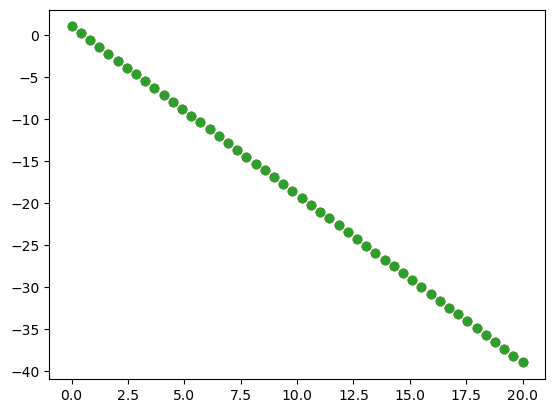

In [11]:
plt.scatter(X,y)
plt.show()

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Implement the stop criteria (Gradient Check).
#### Implement the convergence check (cost check).
#### You can use any small values for stop criteria and convergence check. However, the used values in the current implementation used 0.001 for both.

In [ ]:
def BGD(X, lr = 0.001, itteration = 1000):
    m = len(X)
    cost = []
    all_theta_zero = []
    all_theta_one = []
    theta_zero, theta_one = 0, 0
    
    for i in range(itteration):
        print("="*10, f"Iteration {i+1}", '='*10)
        all_theta_zero.append(theta_zero)
        all_theta_one.append(theta_one)
        
        y_pred = theta_zero + theta_one * X
        print(f"h(x) = \n{y_pred}")
        error_vector = y_pred - y
        print(f"error = \n{error_vector}")
        J = np.sum(error_vector ** 2) / (2 * m)
        print(f"Cost = {J}")
        cost.append(J)
        
        grad_theta_zero = np.sum(error_vector) / m
        grad_theta_one = np.sum(error_vector * X) / m
        
        grad_norm = np.linalg.norm(np.array([grad_theta_zero, grad_theta_one]))
        print(f"Gradient Norm = {grad_norm}")
        if grad_norm < 0.001:
            print(f"Convergence After {i+1} iteration")
            break
        
        theta_zero = theta_zero - lr * grad_theta_zero
        theta_one = theta_one - lr * grad_theta_one
        print(f"Theta Zero New = {theta_zero}")
        print(f"Theta One New = {theta_one}")
    return theta_zero, theta_one, all_theta_zero, all_theta_one, cost

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [38]:
t0, t1, ts0, ts1, j = BGD(X, 0.0005, 300)

========== Iteration 1 ==========
h(x) = 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
error = 
[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]
Cost = 249.88775510204087
Gradient Norm = 260.08269357432516
Theta Zero New = -0.0095
Theta One New = -0.12969387755102044
========== Iteration 2 ==========
h(x) = 
[-0.0095     -0.06243

#### Calculate r2 score

In [39]:
y_pred = t0 + t1 * X
print(f"r2_score = {r2_score(y, y_pred)}")

r2_score = 0.9977566779928114


##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

#### Plot loss vs. epochs

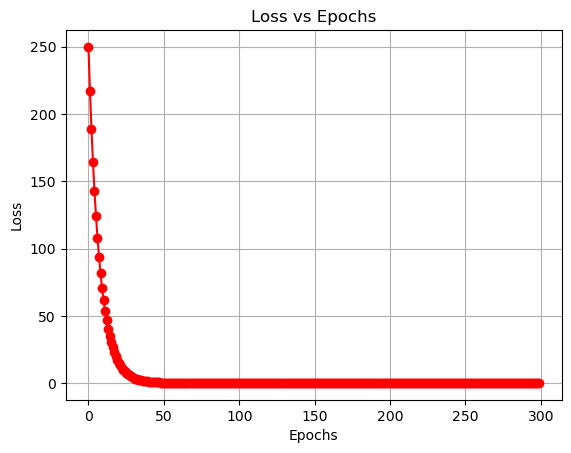

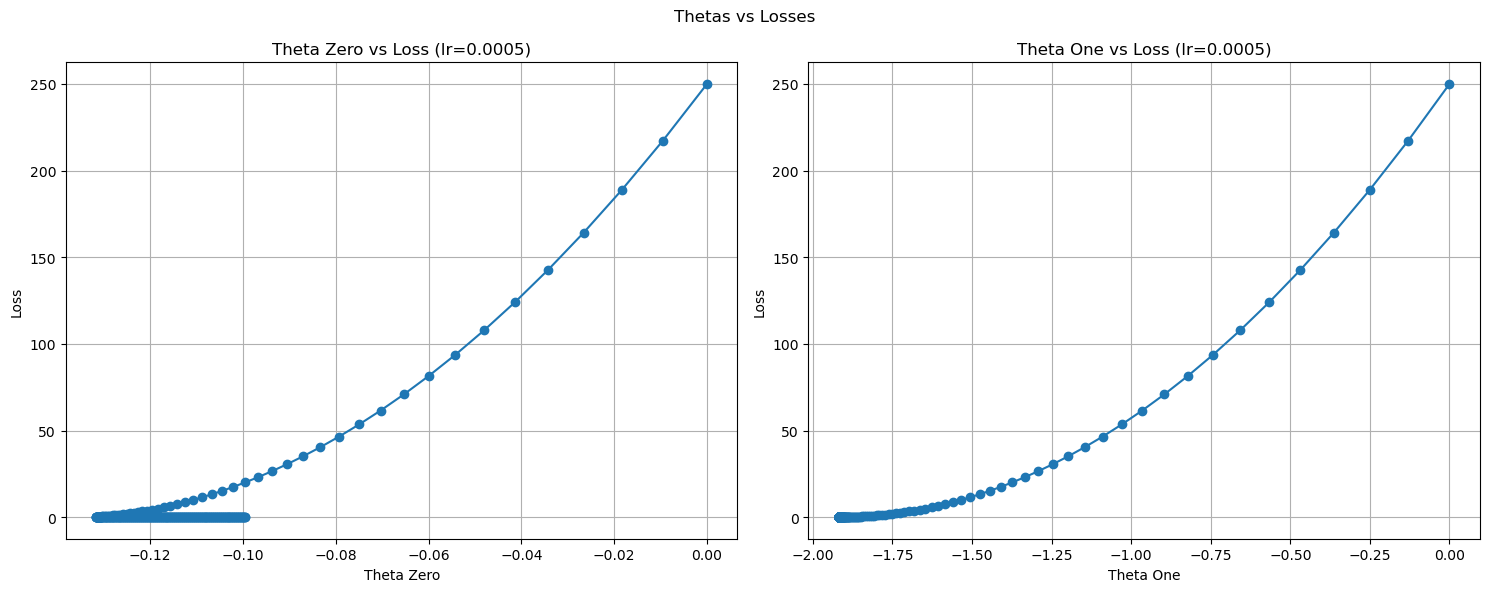

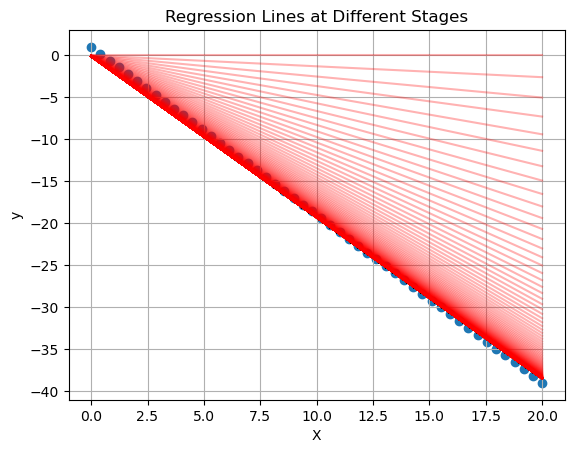

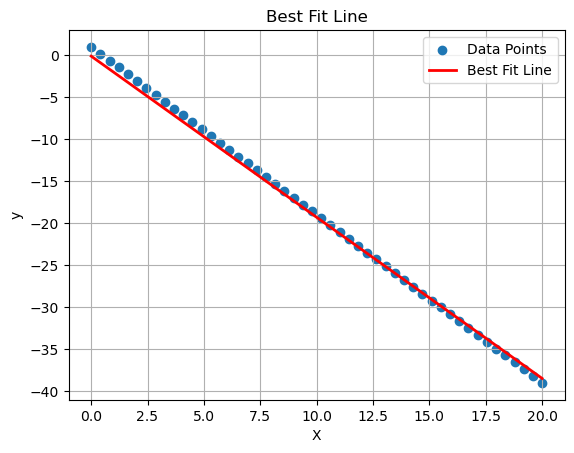

In [40]:
vis(X, y, y_pred, ts0, ts1, j, 0.0005)

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

##### The following results uses alpha = 0.00005 and max. iterations = 1000.

In [41]:
t0, t1, ts0, ts1, j = BGD(X, 0.00005, 1000)

========== Iteration 1 ==========
h(x) = 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
error = 
[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]
Cost = 249.88775510204087
Gradient Norm = 260.08269357432516
Theta Zero New = -0.00095
Theta One New = -0.012969387755102042
========== Iteration 2 ==========
h(x) = 
[-0.00095    -0.006

In [42]:
y_pred = t0  + t1 * X
r2_score(y, y_pred)

0.9976342313674937

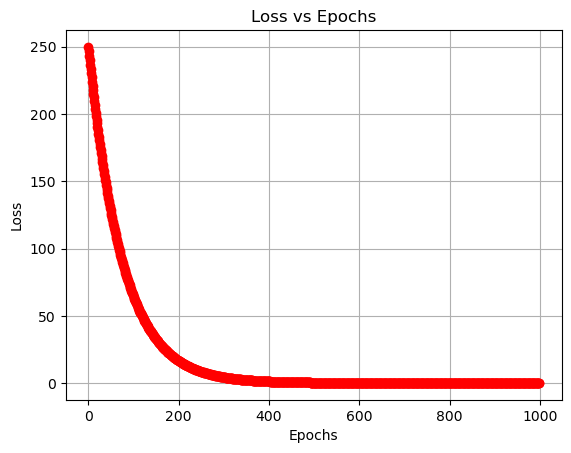

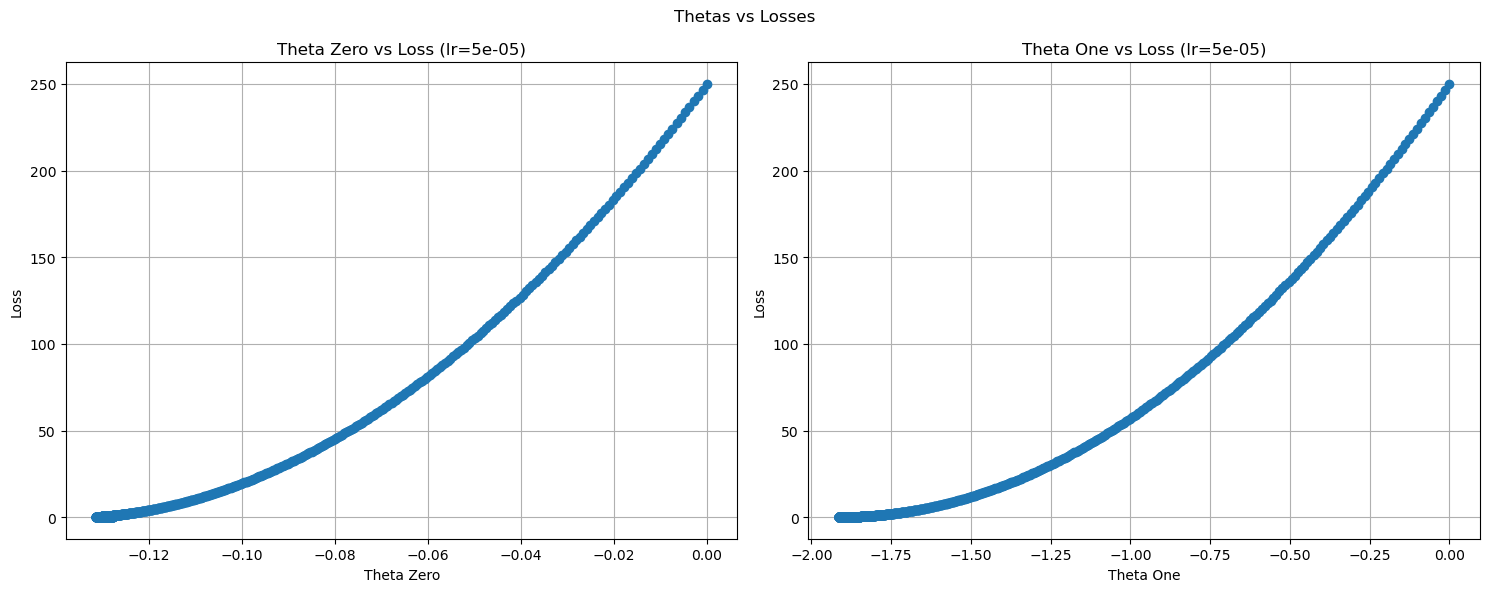

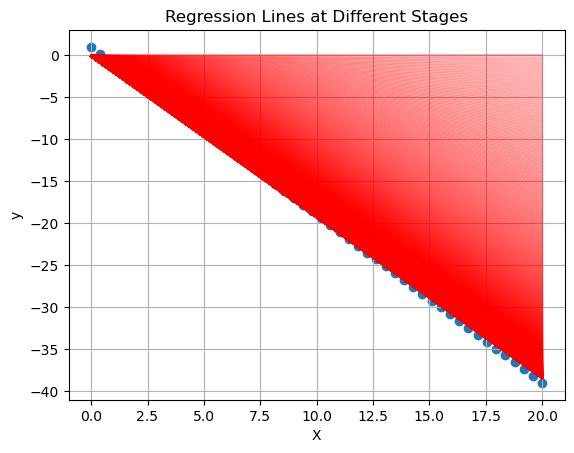

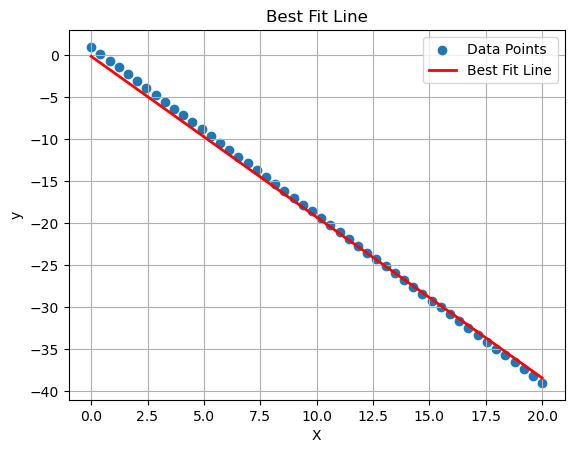

In [43]:
vis(X, y, y_pred, ts0, ts1, j, 0.00005)

##### The following results uses alpha = 0.005 and max. iterations = 300.

In [44]:
t0, t1, ts0, ts1, j = BGD(X, 0.005, 300)

========== Iteration 1 ==========
h(x) = 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
error = 
[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]
Cost = 249.88775510204087
Gradient Norm = 260.08269357432516
Theta Zero New = -0.095
Theta One New = -1.2969387755102042
========== Iteration 2 ==========
h(x) = 
[ -0.095       -0.62436

In [45]:
y_pred = t0 + t1 * X
r2_score(y, y_pred)

0.9988771892541253

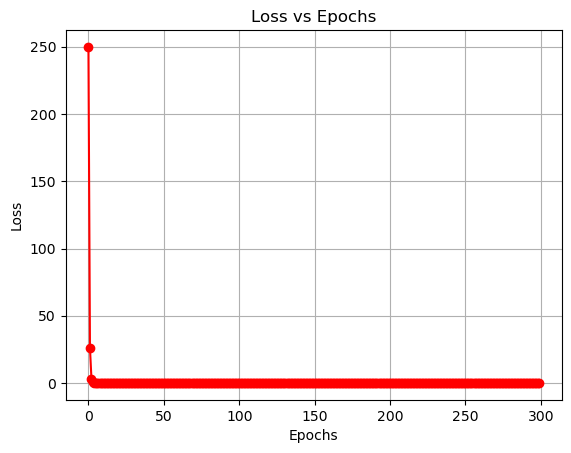

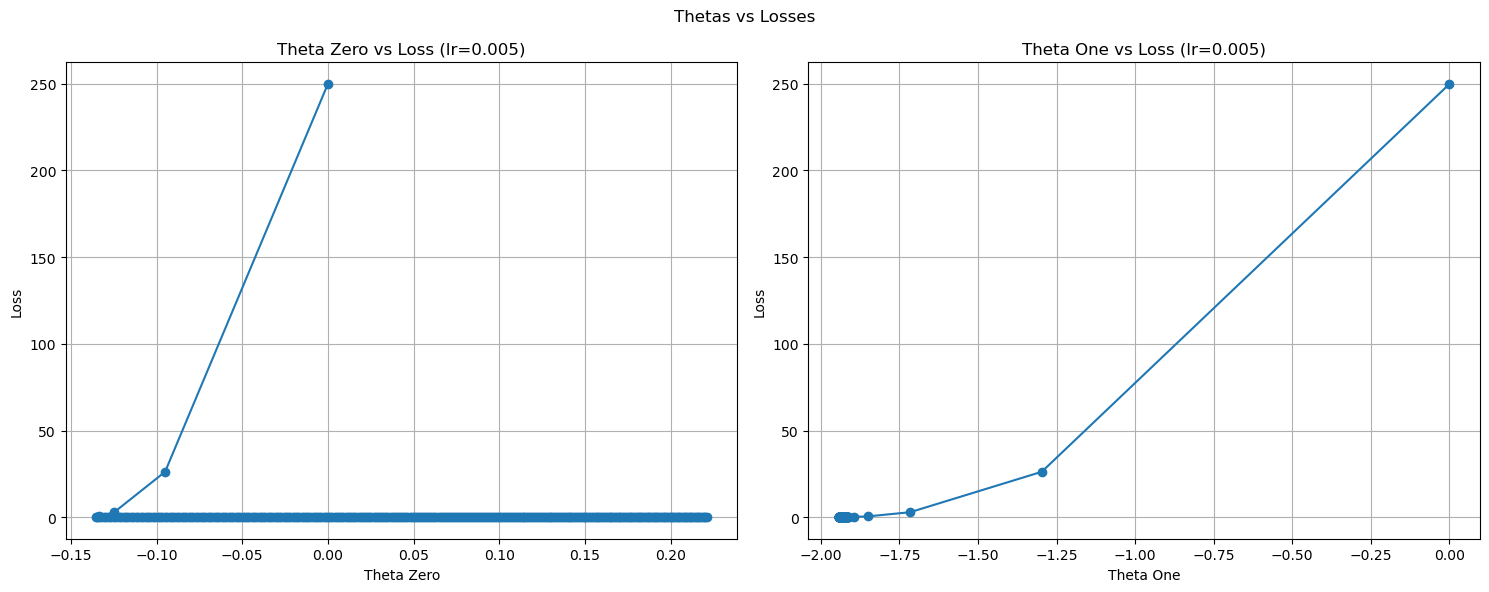

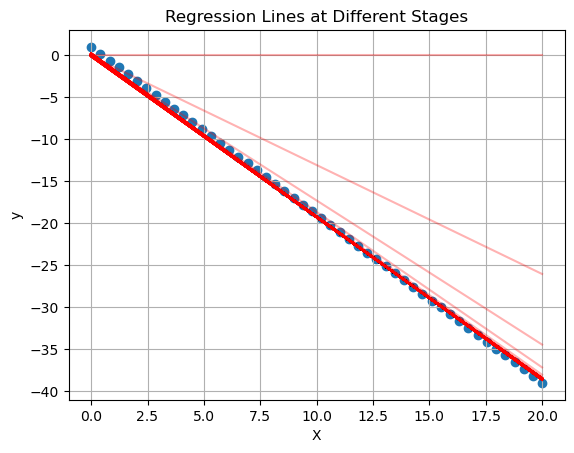

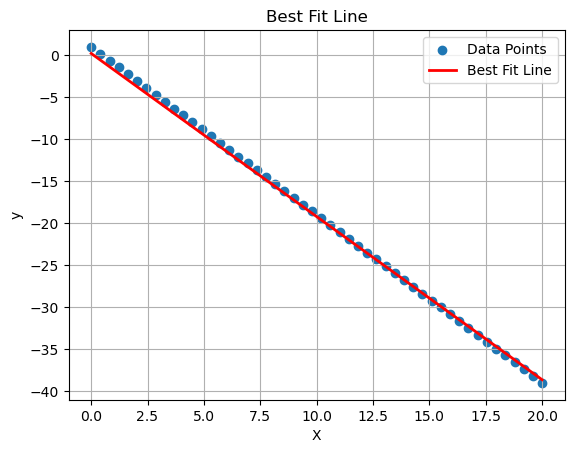

In [48]:
vis(X, y, y_pred, ts0, ts1, j, lr = 0.005)

## Stochastic GD

#### Update the implementation of the Batch GD to be Stochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to the Batch GD.
#### Do not forget to shuffle the data.

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
- <font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>
- <font color='red'><b>To obtain the same results use np.random.seed(101) before shuffle</b></font>

In [53]:
def SGD(x, y_, lr = 0.01, epoch = 1000):
    np.random.seed(101)
    alldata = np.column_stack((x, y_))
    alldata = shuffle(alldata)
    X = alldata[:, :-1].flatten()
    y = alldata[:, -1]    
    m = len(X)
    
    theta_0 = 0
    theta_1 = 0
    losses = []
    theta_0_all = []
    theta_1_all = []
    
    for i in range(epoch):
        for j in range(m):
            theta_0_all.append(theta_0)
            theta_1_all.append(theta_1)
            y_pred = theta_0 + theta_1 * X[j]
            error = y_pred - y[j]
            J = (error ** 2) / 2
            losses.append(J)
            grad_0 = error
            grad_1 = error * X[j]
            norm = np.linalg.norm(np.array([grad_0, grad_1]))
            if norm < 0.001:
                print(f"Convergence After {i+1} Epochs")
                return theta_0, theta_1, theta_0_all, theta_1_all, losses
            theta_0 = theta_0 - lr * grad_0
            theta_1 = theta_1 - lr * grad_1
        # Convergence check
        if ((i > 1) and (abs(losses[- 1] - losses[-(m+1)]) < 0.001)):
            print(f"Convergence After {i+1} Epochs")
            break
    return theta_0, theta_1, theta_0_all, theta_1_all, losses

##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [54]:
t0, t1, ts0, ts1, j = SGD(X,y,0.0005,300)

Convergence After 3 Epochs


In [55]:
y_pred = t0 + t1 * X
r2_score(y, y_pred)

0.9976568143190673

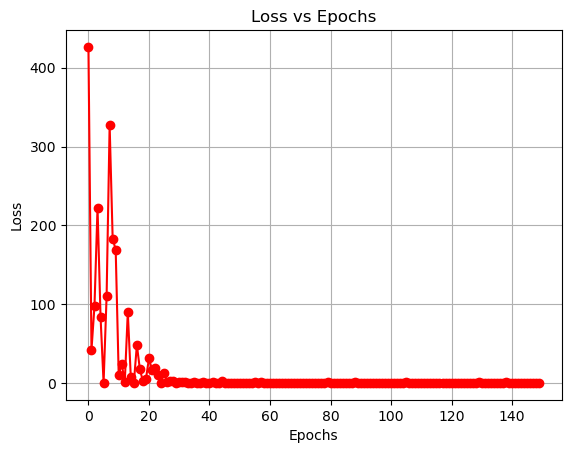

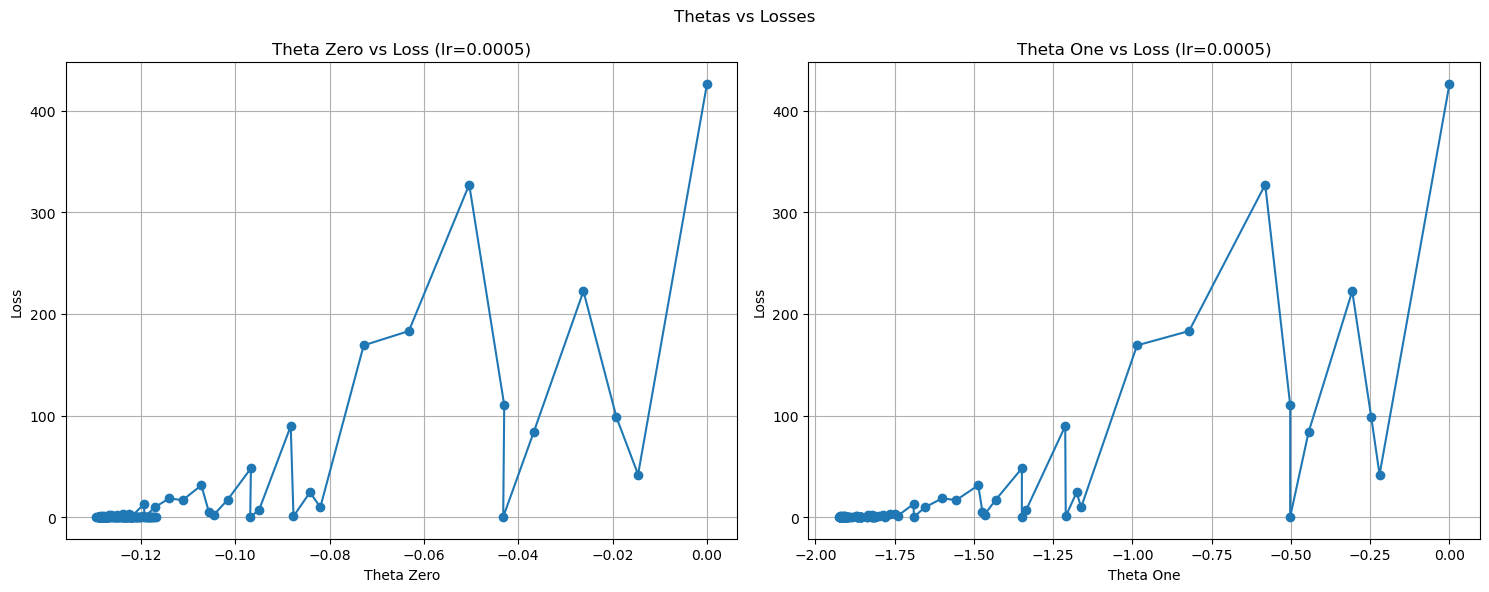

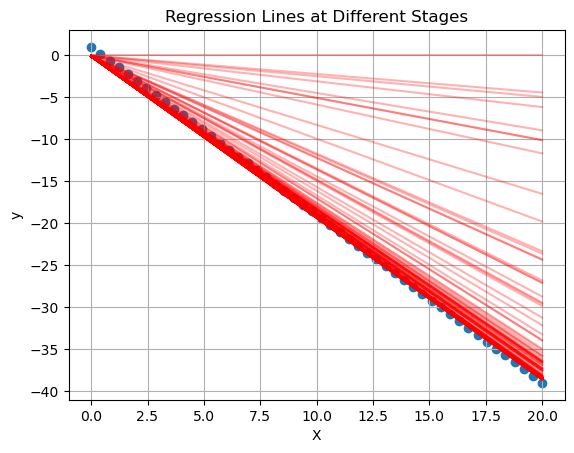

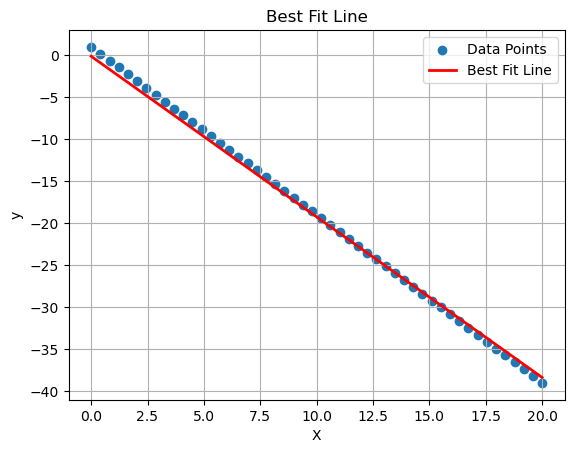

In [56]:
vis(X, y, y_pred, ts0, ts1, j, lr = 0.0005)

##### The following results uses alpha = 0.0001 and max. iterations = 300.

In [57]:
t0, t1, ts0, ts1, j = SGD(X,y,0.0001,300)

Convergence After 10 Epochs


In [58]:
y_pred = t0 + t1 *  X
r2_score(y, y_pred)

0.9976375173449827

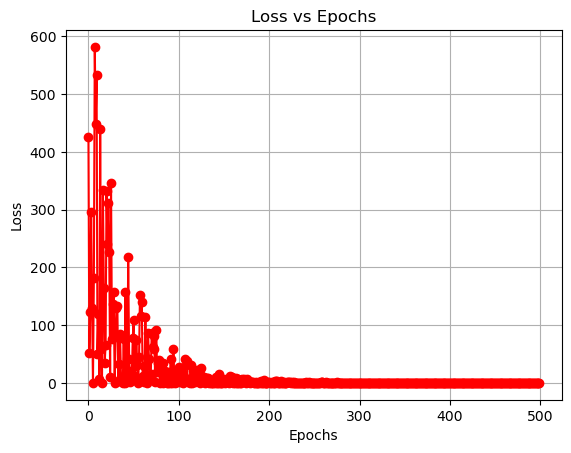

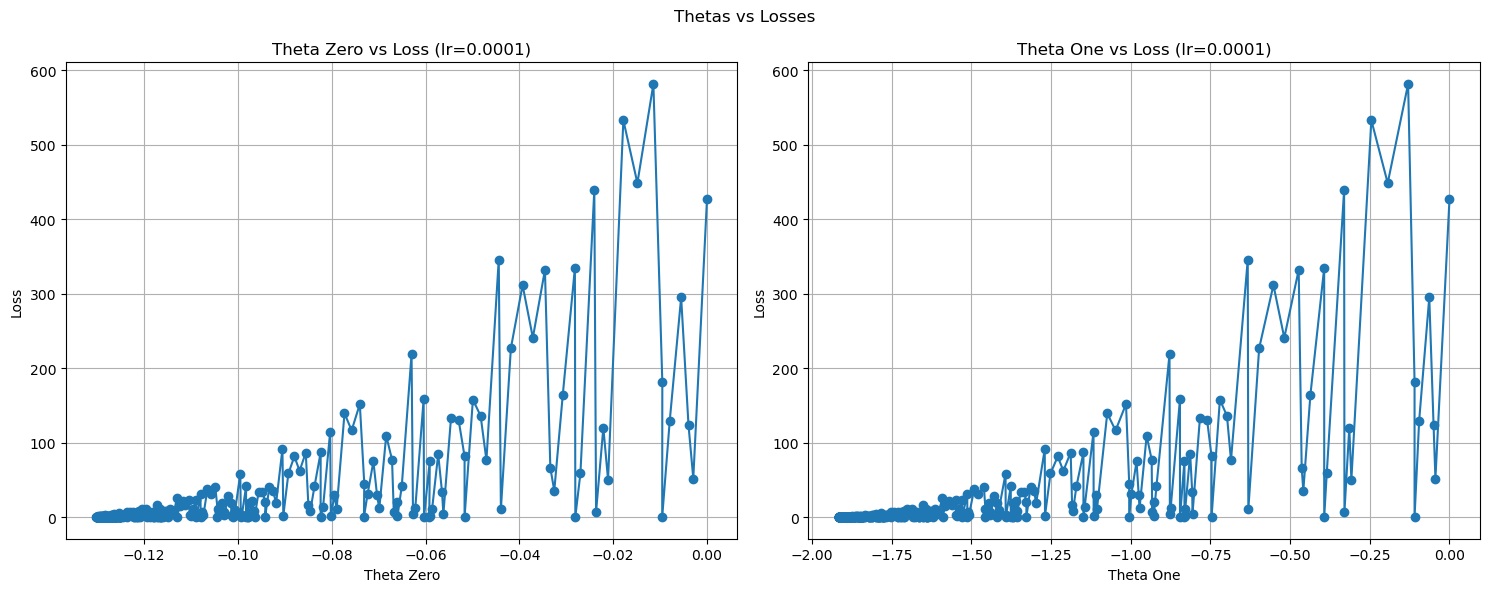

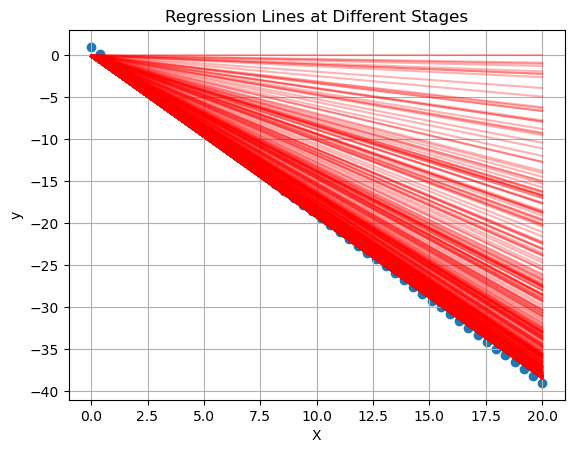

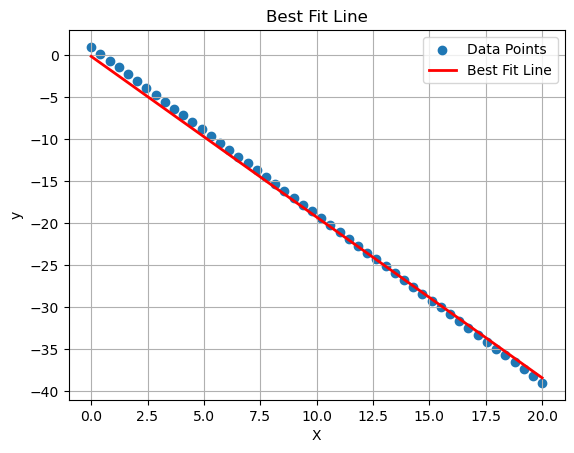

In [59]:
vis(X, y, y_pred, ts0, ts1, j, 0.0001)

##### The following results uses alpha = 0.00007 and max. iterations = 300.

In [60]:
t0, t1, ts0, ts1, j = SGD(X,y,0.00007,300)

Convergence After 13 Epochs


In [61]:
y_pred = t0 + t1 * X
r2_score(y, y_pred)

0.9976193527156806

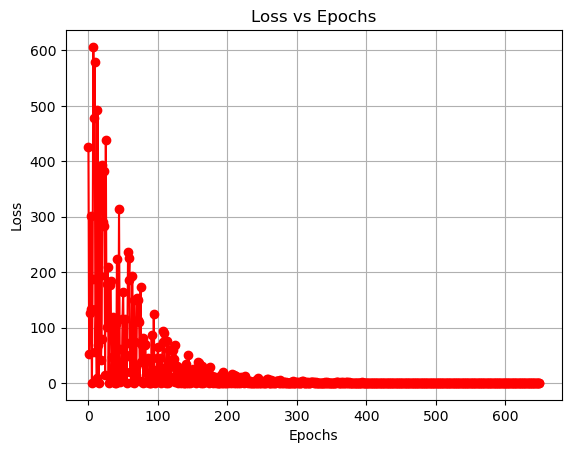

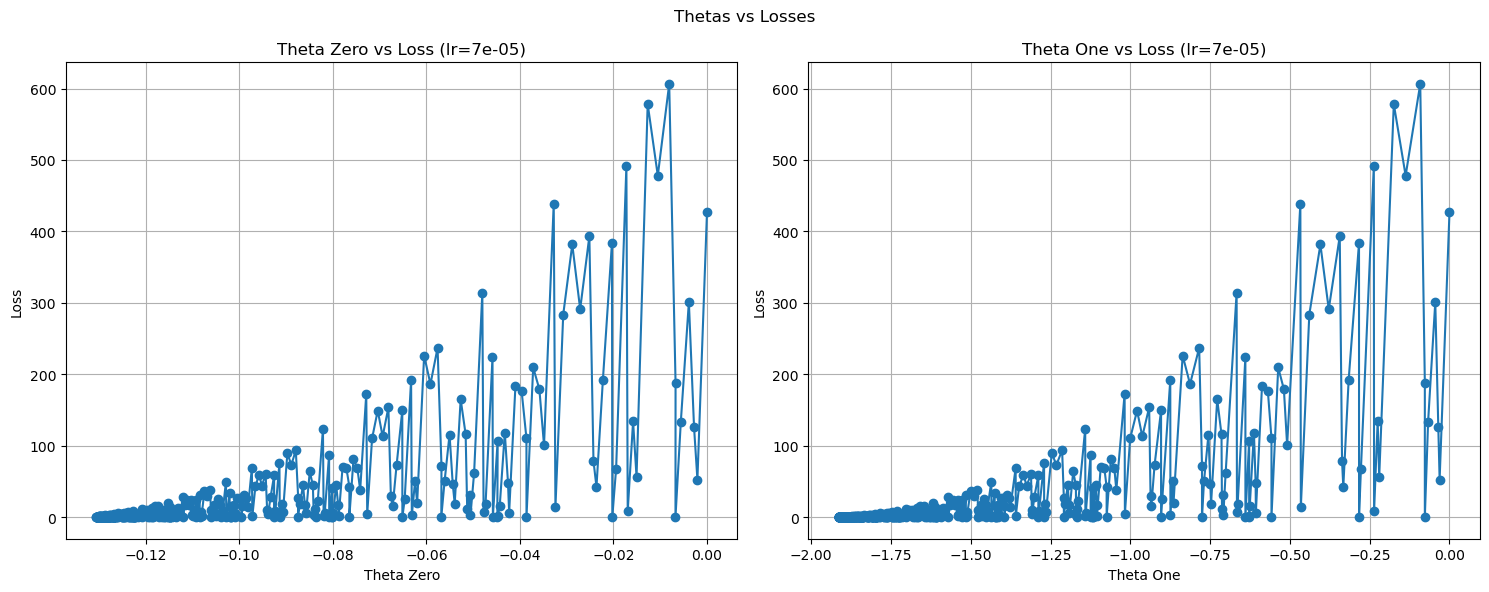

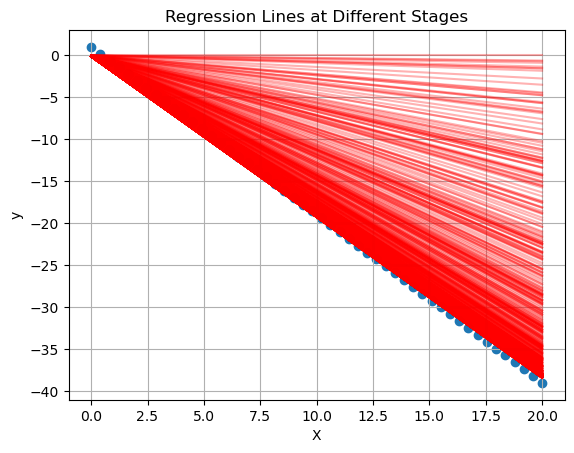

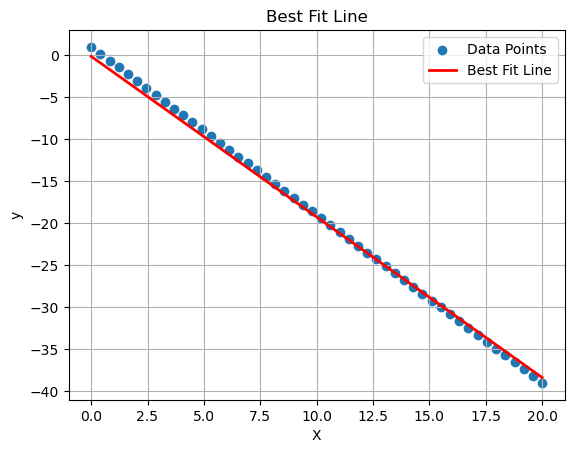

In [62]:
vis(X, y, y_pred, ts0, ts1, j, 0.00007)

## Mini-Batch GD

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
#### Do not forget to shuffle the data

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
-<font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>
- <font color='red'><b>To obtain the same results use np.random.seed(101) before shuffle</b></font>

In [67]:
def MGD(x, y_, lr = 0.1, epoch = 1000, b = 32):
    np.random.seed(101)
    alldata = np.column_stack((x, y_))
    alldata = shuffle(alldata)
    X = alldata[:, :-1].flatten()
    y = alldata[:, -1]    
    m = len(X)
    
    theta_0 = 0
    theta_1 = 0
    losses = []
    theta_0_all = []
    theta_1_all = []
    
    number_of_batches = m // b

    for i in range(epoch):
        for j in range(number_of_batches):
            start = j * b
            end = start + b
            theta_0_all.append(theta_0)
            theta_1_all.append(theta_1)
            y_pred = theta_0 + theta_1 * X[start:end]
            error = y_pred - y[start:end]
            J = np.sum(error ** 2) / (2 * b)
            losses.append(J)
            grad_0 = np.sum(error) / b
            grad_1 = np.sum(error * X[start:end]) / b
            norm = np.linalg.norm(np.array([grad_0, grad_1]))
            if norm < 0.001:
                print(f"Convergence After {i+1} Epochs")
                return theta_0, theta_1, theta_0_all, theta_1_all, losses
            theta_0 = theta_0 - lr * grad_0
            theta_1 = theta_1 - lr * grad_1
        if ((i > 1) and (abs(losses[- 1] - losses[- number_of_batches]) < 0.01)):
            print(f"Convergence After {i+1} Epochs")
            break
    return theta_0, theta_1, theta_0_all, theta_1_all, losses

##### The following results uses batch size=5, alpha = 0.0005 and max. iterations = 300.

In [68]:
t0, t1, ts0, ts1, j = MGD(X, y, lr = 0.0005, epoch = 300, b = 5)

In [70]:
y_pred = t0 + t1 * X
r2_score(y, y_pred)

0.9988827638032283

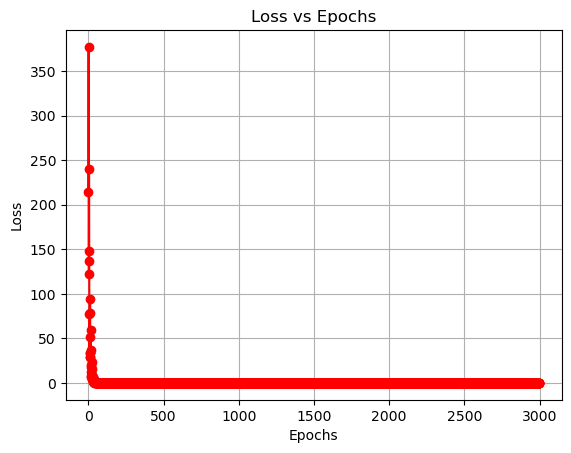

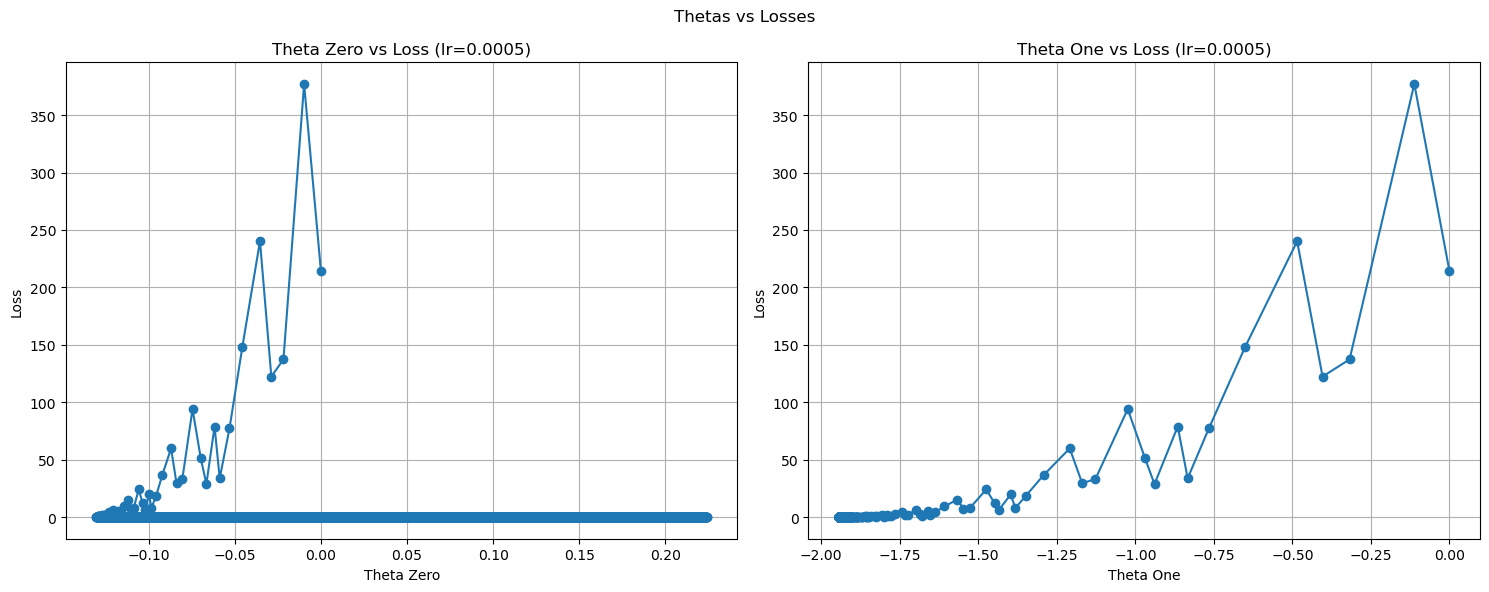

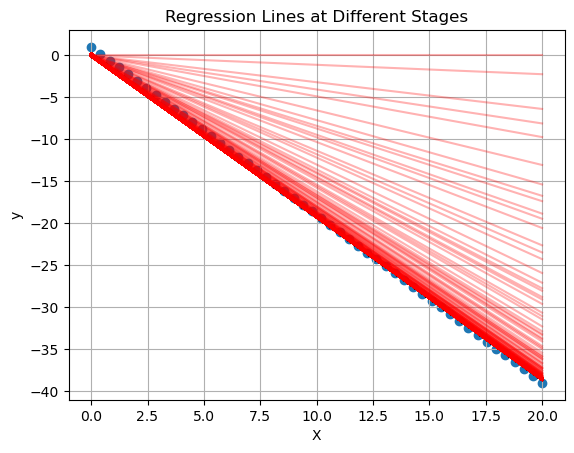

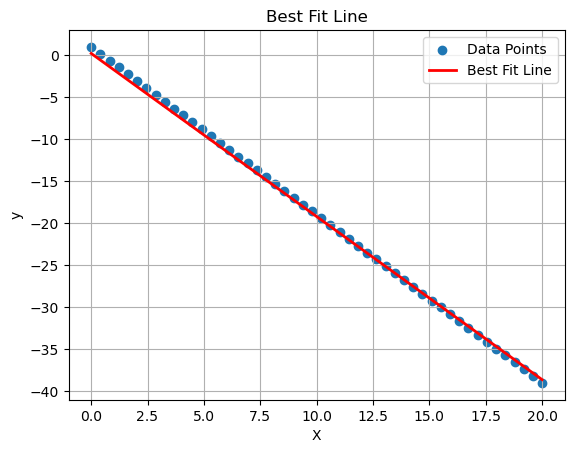

In [72]:
vis(X, y, y_pred,ts0, ts1, j, 0.0005)

##### The following results uses batch size=10, alpha = 0.0005 and max. iterations = 300.

In [73]:
t0, t1, ts0, ts1, j = MGD(X, y, lr = 0.0005, epoch = 300, b = 10)

Convergence After 13 Epochs


In [74]:
y_pred = t0 + t1 * X
r2_score(y, y_pred)

0.9972282850197721

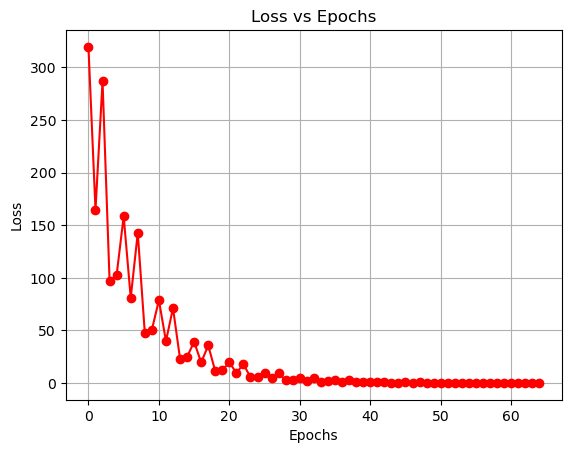

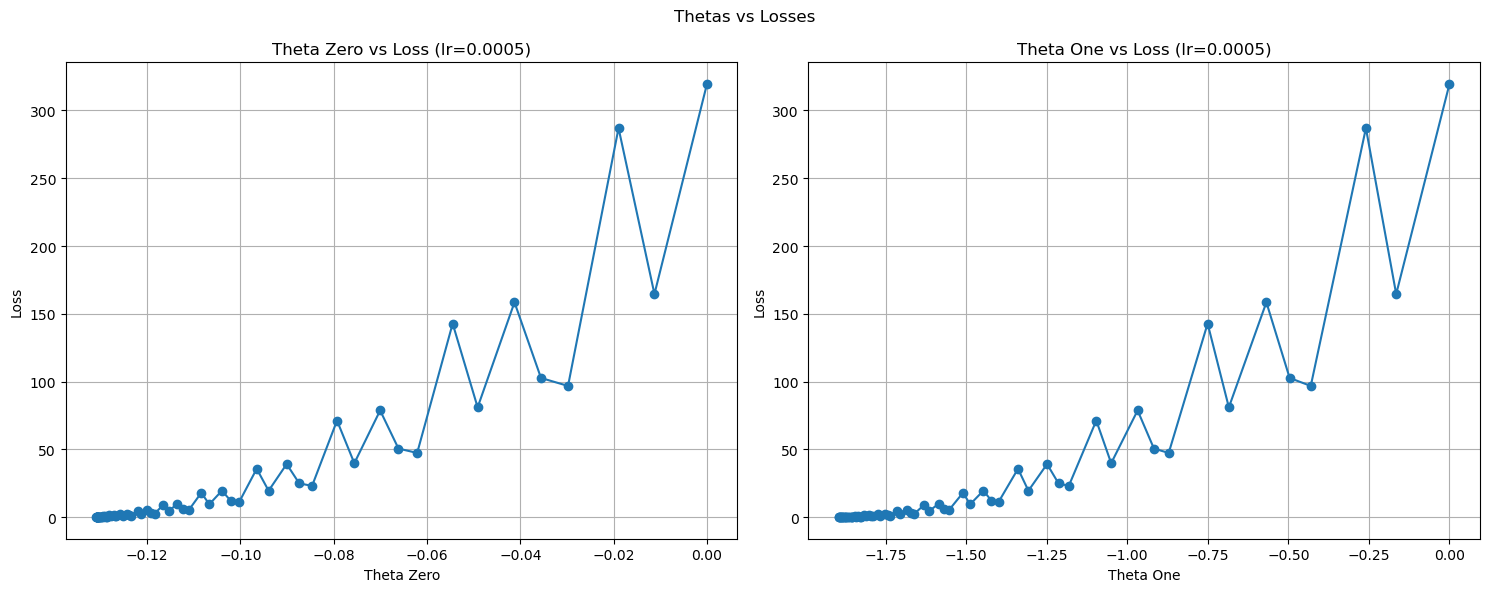

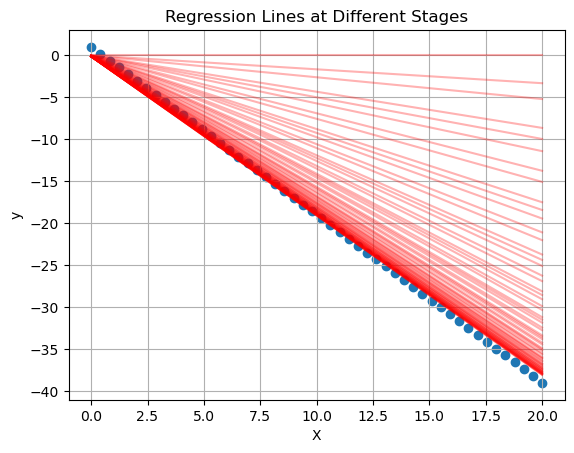

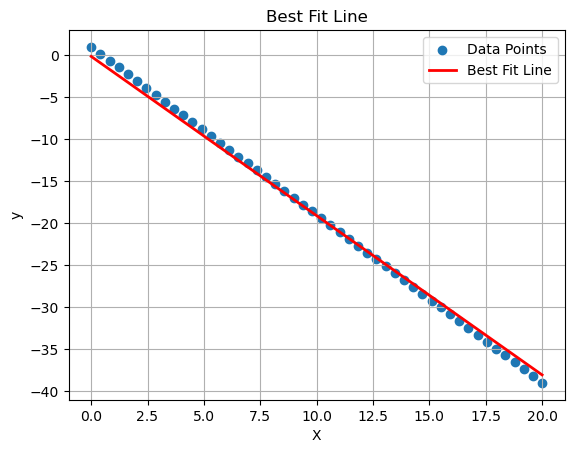

In [75]:
vis(X, y, y_pred, ts0, ts1, j, 0.0005)

##### The following results uses batch size=20, alpha = 0.0005 and max. iterations = 300.

In [76]:
t0, t1, ts0, ts1, j = MGD(X, y, lr = 0.0005, epoch = 300, b = 20)

Convergence After 22 Epochs


In [77]:
y_pred = t0 + t1 * X
r2_score(y, y_pred)

0.9927184089438699

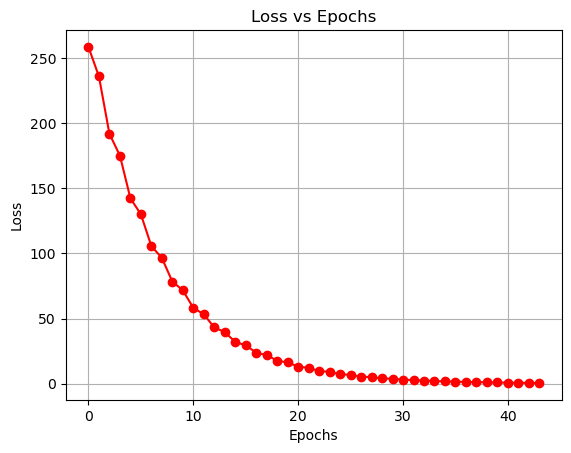

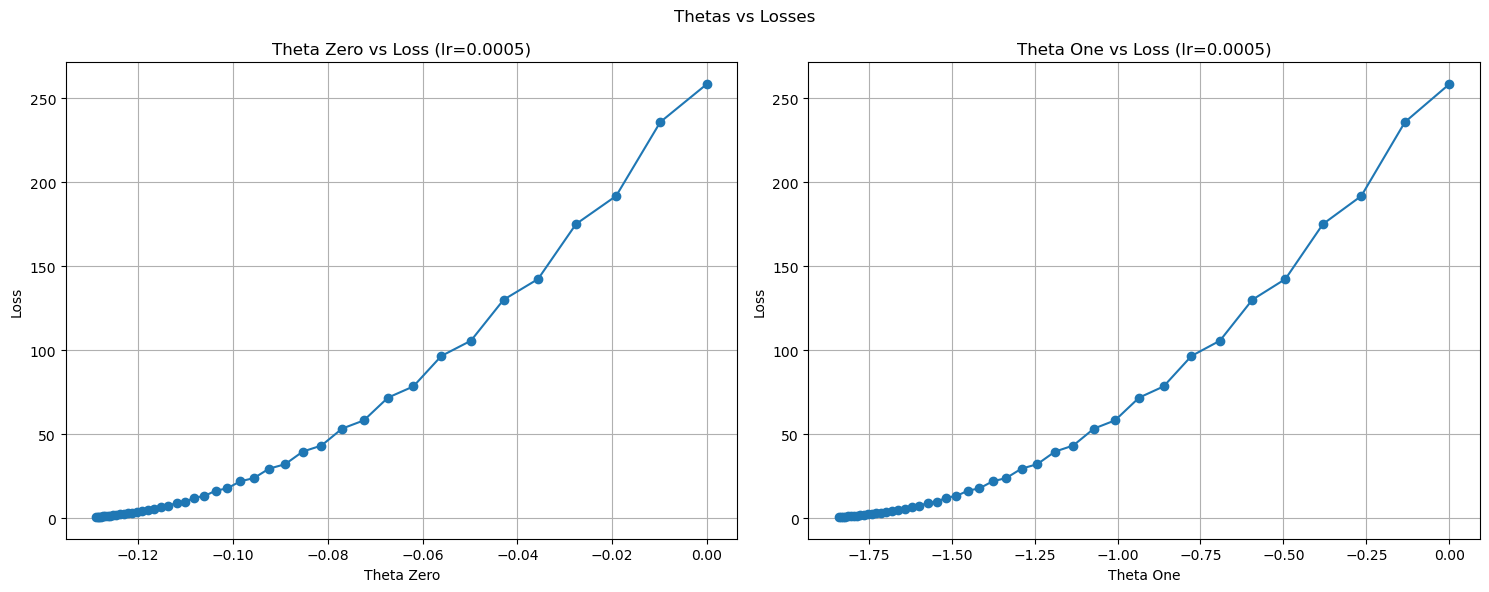

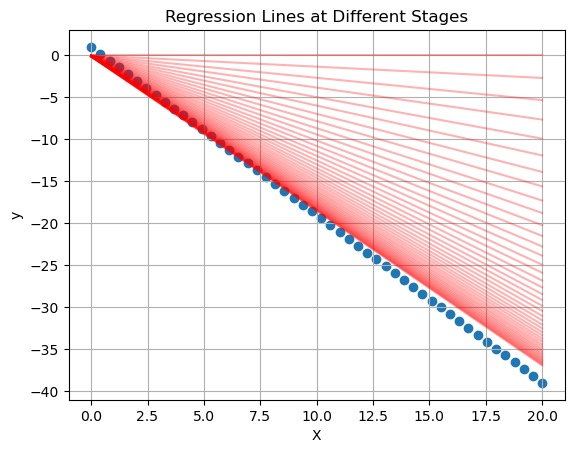

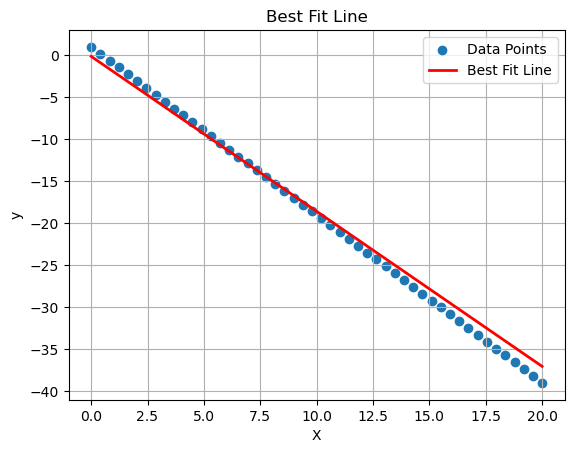

In [78]:
vis(X, y, y_pred, ts0, ts1, j, 0.0005)